Wiki Acontecimientos

In [1]:
%matplotlib inline
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import wikipedia


Necesitamos cadenas de texto de meses y días.


In [2]:
wikipedia.set_lang("es")
meses_order=["enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"]
meses={"enero":31,"febrero":29,"marzo":31,"abril":30,"mayo":31,"junio":30,"julio":31,"agosto":31,"septiembre":30,"octubre":31,"noviembre":30,"diciembre":31}
dias_es=[]
dia_annio_es={}
count=0;
for m in meses_order:
    for d in range(1,meses[m]+1):
        count+=1;
        dia=str(d)+"_de_"+m
        dia_annio_es[dia]=count
        dias_es.append(dia)
acontecimientos_es={}
for d in dias_es:     
    w= wikipedia.page(d)
    acontecimientos_es[d]=w.section("Acontecimientos").split("\n")

Hacemos lo mismo para la versión en inglés

In [11]:
wikipedia.set_lang("en")
meses_order=["January","February","March","April","May","June","July","August","September","October","November","December"]
meses={"January":31,"February":29,"March":31,"April":30,"May":31,"June":30,"July":31,"August":31,"September":30,"October":31,"November":30,"December":31}
dias_eng=[]
dia_annio_eng={}
count=0;
for m in meses_order:
    for d in range(1,meses[m]+1):
        count+=1;
        dia=m+"_"+str(d)
        dia_annio_eng[dia]=count
        dias_eng.append(dia)
acontecimientos_eng={}
for d in dias_eng:     
    w= wikipedia.page(d,auto_suggest=False)
    acontecimientos_eng[d]=w.section("Events").split("\n")


366


In [12]:
theta_es=[]
r_es=[]
for d in dias_es:
    acontecimiento=acontecimientos_es[d]
    theta_es.append((dia_annio_es[d]*363/364+1-363/364)*np.pi/180)
    r_es.append(len(acontecimiento))


In [13]:
theta_eng=[]
r_eng=[]
for d in dias_eng:
    acontecimiento=acontecimientos_eng[d]
    theta_eng.append((dia_annio_eng[d]*363/364+1-363/364)*np.pi/180)
    r_eng.append(len(acontecimiento))


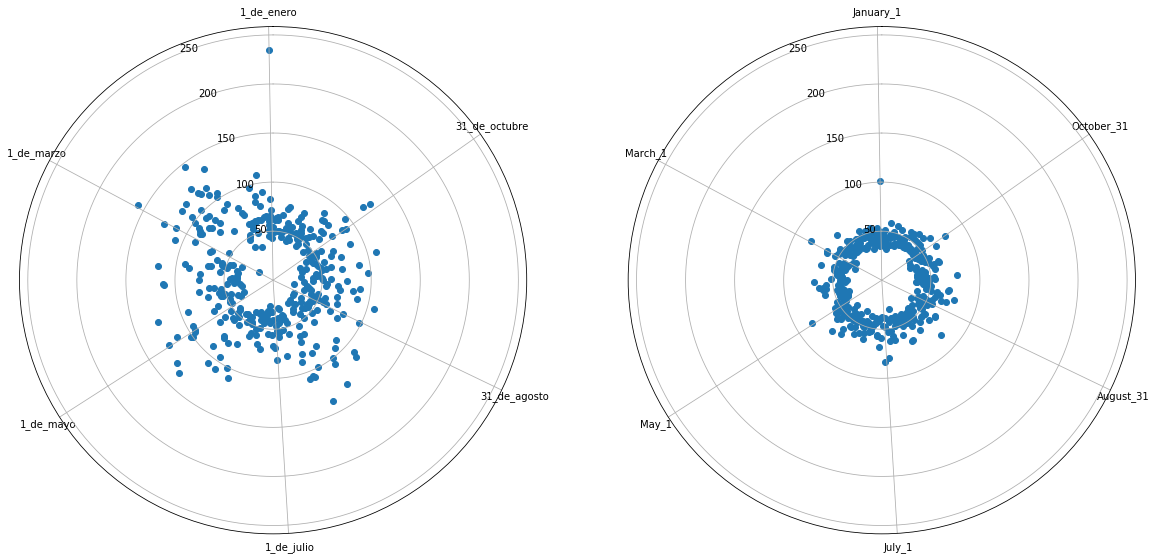

In [59]:
thet_grids=[t*180/np.pi for t in theta_es[0:-1:61]]
thet_grids_label=[t for t in dias_es if dia_annio_es[t]%61 == 0 or t=="1_de_enero"]

fig,ax = plt.subplots(nrows=1,ncols=2, subplot_kw=dict(projection='polar'))
ax[0].set_theta_zero_location("N")
#ax.set_theta_direction(1)

ax[0].set_thetagrids(thet_grids, labels=thet_grids_label)
ax[0].scatter(theta_es, r_es)
ax[0].set_rmin(0)
ax[0].set_rmax(np.max(r_es)*1.1)





thet_grids=[t*180/np.pi for t in theta_eng[0:-1:61]]
thet_grids_label=[t for t in dias_eng if dia_annio_eng[t]%61 == 0 or t=="January_1"]

#ax = plt.subplot(111, projection='polar')
ax[1].set_theta_zero_location("N")
#ax.set_theta_direction(1)

ax[1].set_thetagrids(thet_grids, labels=thet_grids_label)
ax[1].scatter(theta_eng, r_eng)
ax[1].set_rmin(0)
ax[1].set_rmax(np.max(r_es)*1.1)

#fig.show()



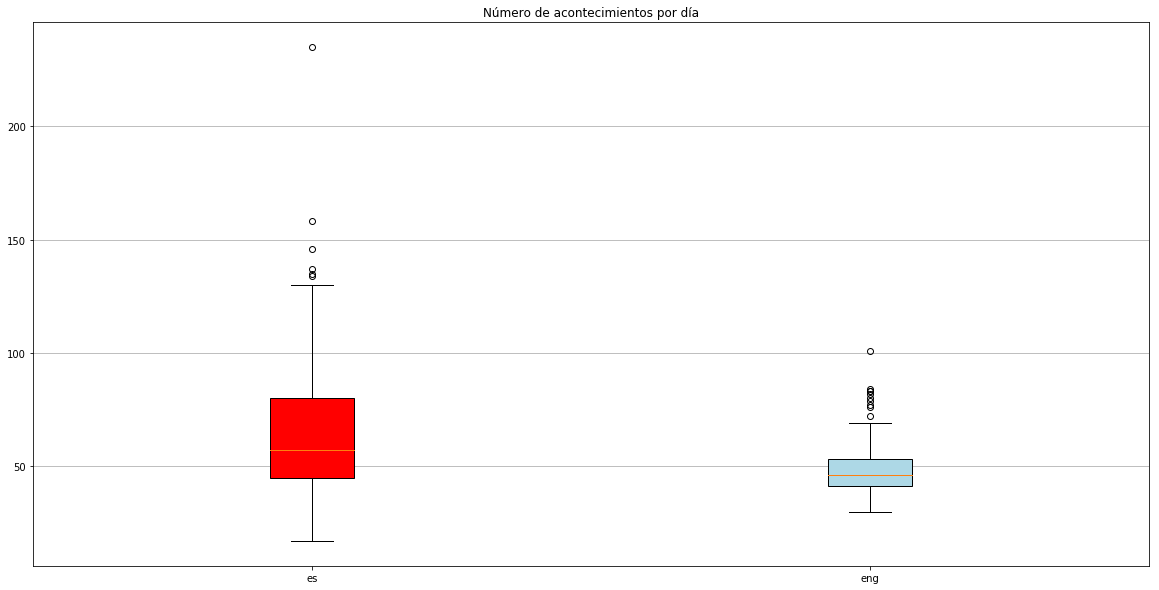

In [40]:
labels = ['es', 'eng']
ax = plt.subplot(111)

bplot1=ax.boxplot([r_es,r_eng],vert=True,patch_artist=True,labels=labels)
ax.set_title('Número de acontecimientos por día')
ax.yaxis.grid(True)

colors = ['red', 'lightblue']
for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)

plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

